# Obdelava podatkov 2. del

In [107]:
import datetime
import csv
import pandas as pd
import numpy as np

In [108]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [109]:
df=pd.read_csv('data/DATA_rpi_data_long_R.csv',names=column_names)

In [110]:
df.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [111]:
df.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [112]:
df.dtypes

Type A        object
Measure A     object
Units A       object
Type B        object
Measure B     object
Units B       object
Type C        object
Measure C    float64
Units C       object
Datetime      object
dtype: object

In [113]:
df['Datetime']=pd.to_datetime(df['Datetime'])

In [114]:
df=df.set_index('Datetime')

In [115]:
#df = df.astype({"Measure A": 'float64','Measure B':'float64','Measure C':'float64'})

**Urejanje prikaza podatkov**



In [116]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [117]:
df=df.rename(columns=map_dict)

In [118]:
df.head()

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C
Datetime,,,,,,,,,
2016-11-24 13:36:25,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s
2016-11-24 13:36:55,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s
2016-11-24 13:37:25,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s
2016-11-24 13:37:57,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s
2016-11-24 13:38:27,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s


In [119]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [120]:
df=df.drop(columns=drop_list)

In [121]:
df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Datetime,,,
2016-11-24 13:36:25,26.992,91.80,14.31
2016-11-24 13:36:55,24.532,88.19,14.12
2016-11-24 13:37:25,20.225,59.86,14.11
2016-11-24 13:37:57,19.332,91.81,14.22
2016-11-24 13:38:27,22.494,92.05,14.08


**Urejanje datuma in časa**



In [203]:
df['Date']=pd.to_datetime(df.index.date)

In [204]:
df['Time']=df.index.time

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [124]:
df.tail()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
Datetime,,,,,
NaT,retrieve,2016-11-24 19:18:03,NaN,NaT,NaT
NaT,retrieve,2016-11-24 19:18:06,NaN,NaT,NaT
NaT,retrieve,2016-11-24 19:18:10,NaN,NaT,NaT
NaT,retrieve,2016-11-24 19:18:13,NaN,NaT,NaT
2016-11-24 19:18:16,22.175,85.69,14.23,2016-11-24,19:18:16


In [209]:
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

df['Ping (ms)_float']= df['Ping (ms)'].apply(f)
df['Download (Mbit/s)_float']= df['Download (Mbit/s)'].apply(f)
df['Upload (Mbit/s)_float']= df['Upload (Mbit/s)'].apply(f)

In [126]:
df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float,Upload (Mbit/s)_float
Datetime,,,,,,,,
2016-11-24 13:36:25,26.992,91.80,14.31,2016-11-24,13:36:25,26.992,91.80,14.31
2016-11-24 13:36:55,24.532,88.19,14.12,2016-11-24,13:36:55,24.532,88.19,14.12
2016-11-24 13:37:25,20.225,59.86,14.11,2016-11-24,13:37:25,20.225,59.86,14.11
2016-11-24 13:37:57,19.332,91.81,14.22,2016-11-24,13:37:57,19.332,91.81,14.22
2016-11-24 13:38:27,22.494,92.05,14.08,2016-11-24,13:38:27,22.494,92.05,14.08


In [127]:
df.tail()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float,Upload (Mbit/s)_float
Datetime,,,,,,,,
NaT,retrieve,2016-11-24 19:18:03,NaN,NaT,NaT,NaN,NaN,NaN
NaT,retrieve,2016-11-24 19:18:06,NaN,NaT,NaT,NaN,NaN,NaN
NaT,retrieve,2016-11-24 19:18:10,NaN,NaT,NaT,NaN,NaN,NaN
NaT,retrieve,2016-11-24 19:18:13,NaN,NaT,NaT,NaN,NaN,NaN
2016-11-24 19:18:16,22.175,85.69,14.23,2016-11-24,19:18:16,22.175,85.69,14.23


In [128]:
df.dtypes

Ping (ms)                          object
Download (Mbit/s)                  object
Upload (Mbit/s)                   float64
Date                       datetime64[ns]
Time                               object
Ping (ms)_float                   float64
Download (Mbit/s)_float           float64
Upload (Mbit/s)_float             float64
dtype: object

In [182]:
NaNs_total=df.isna().sum().sum()
NaNs_pct=np.round(100*NaNs_total/(df.shape[0]*df.shape[1]),4)

In [183]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 44 NaNs, equal to 0.8088% of the measurements


In [184]:
df1c=df1.dropna()

In [185]:
df1c.tail()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
668,2016-11-24,19:15:32,20.952,88.67,14.35
669,2016-11-24,19:16:04,19.397,84.86,14.35
670,2016-11-24,19:16:34,20.117,84.99,14.33
671,2016-11-24,19:17:04,17.995,86.21,6.88
679,2016-11-24,19:18:16,22.175,85.69,14.23


In [210]:
df1c=df1c.dropna()

#df1c['Time']=pd.to_datetime(df1c['Time'].dt.time)
df1c.dtypes

Date                 datetime64[ns]
Time                         object
Ping (ms)                   float64
Download (Mbit/s)           float64
Upload (Mbit/s)             float64
dtype: object

**Change values format.**

In [131]:
columns = {'Ping (ms)_float': 'Ping (ms)',
           'Download (Mbit/s)_float': 'Download (Mbit/s)'}

In [143]:
df1=df.drop(columns=['Ping (ms)','Download (Mbit/s)'])
df1=df1.rename(columns=columns)

In [144]:
df1.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)_float
Datetime,,,,,,
2016-11-24 13:36:25,14.31,2016-11-24,13:36:25,26.992,91.80,14.31
2016-11-24 13:36:55,14.12,2016-11-24,13:36:55,24.532,88.19,14.12
2016-11-24 13:37:25,14.11,2016-11-24,13:37:25,20.225,59.86,14.11
2016-11-24 13:37:57,14.22,2016-11-24,13:37:57,19.332,91.81,14.22
2016-11-24 13:38:27,14.08,2016-11-24,13:38:27,22.494,92.05,14.08


In [145]:
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [146]:
df1=df1[reidexed_columns]

In [147]:
df1.dtypes

Date                 datetime64[ns]
Time                         object
Ping (ms)                   float64
Download (Mbit/s)           float64
Upload (Mbit/s)             float64
dtype: object

In [149]:
df1=df1.reset_index(drop=True)

In [150]:
df1.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [152]:
type(df1['Time'][0])

datetime.time

In [153]:
df1.to_csv('data/df1.csv')

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [154]:
df1.mean()

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [155]:
df1.std()

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [169]:
stats_ping=[]
stats_ping.append(np.round(df1.mean()['Ping (ms)'],2))
stats_ping.append(np.round(df1.std()['Ping (ms)'],2))


In [170]:
stats_download=[]
stats_download.append(np.round(df1.mean()['Download (Mbit/s)'],2))
stats_download.append(np.round(df1.std()['Download (Mbit/s)'],2))


In [171]:
stats_upload=[]
stats_upload.append(np.round(df1.mean()['Upload (Mbit/s)'],2))
stats_upload.append(np.round(df1.std()['Upload (Mbit/s)'],2))


In [172]:
print(f'Average ping time: {stats_ping[0]} ± {stats_ping[1]} ms')
print(f'Average download speed: {stats_download[0]} ± {stats_download[1]} Mbit/s')
print(f'Average upload speed: {stats_upload[0]} ± {stats_upload[1]} Mbit/s')

Average ping time: 21.12 ± 5.16 ms
Average download speed: 90.45 ± 3.47 Mbit/s
Average upload speed: 13.7 ± 1.08 Mbit/s


**Izračun minimalnih in maksimalnih vrednosti**


In [173]:
mima_ping=[]
mima_ping.append(np.round(df1.min()['Ping (ms)'],2))
mima_ping.append(np.round(df1.max()['Ping (ms)'],2))


In [174]:
mima_download=[]
mima_download.append(np.round(df1.min()['Download (Mbit/s)'],2))
mima_download.append(np.round(df1.max()['Download (Mbit/s)'],2))


In [176]:
mima_upload=[]
mima_upload.append(np.round(df1.min()['Upload (Mbit/s)'],2))
mima_upload.append(np.round(df1.max()['Upload (Mbit/s)'],2))


In [177]:
print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

Min ping time: 16.17 ms. Max ping time: 76.53 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


**Uporaba idxmin, idxmax and iloc**


In [239]:
p1=df1.min()['Ping (ms)']
p2=df1[df1['Ping (ms)']==df1.min()['Ping (ms)']]['Time']
p3=df1.max()['Ping (ms)']
p4=df1[df1['Ping (ms)']==df1.max()['Ping (ms)']]['Time']

print('Ping measure reached minimum on {} at {}'.format(p1,p2.values[0]))

print('Ping measure reached maximum on {} at {}'.format(p3,p4.values[0]))

Ping measure reached minimum on 16.167 at 15:26:20
Ping measure reached maximum on 76.528 at 17:30:06


In [212]:
df1[df1['Ping (ms)']==df1.min()['Ping (ms)']]['Time']

217    15:26:20
Name: Time, dtype: object

In [214]:
df1.min()['Ping (ms)']

16.167

In [223]:
df1['Ping (ms)'].corr(df1['Download (Mbit/s)'])

-0.04562611025837997

In [224]:
print(f"Correlation coefficient between ping and download: {df1['Ping (ms)'].corr(df1['Download (Mbit/s)'])}")
print(f"Correlation coefficient between ping and upload: {df1['Ping (ms)'].corr(df1['Upload (Mbit/s)'])}")
print(f"Correlation coefficient between upload and download: {df1['Upload (Mbit/s)'].corr(df1['Download (Mbit/s)'])}")

Correlation coefficient between ping and download: -0.04562611025837997
Correlation coefficient between ping and upload: -0.46309871383001816
Correlation coefficient between upload and download: 0.08368996933725134


## Visualize Data



In [231]:
import matplotlib.pyplot as pp
%matplotlib inline 

**Plot Internet speed stats.**


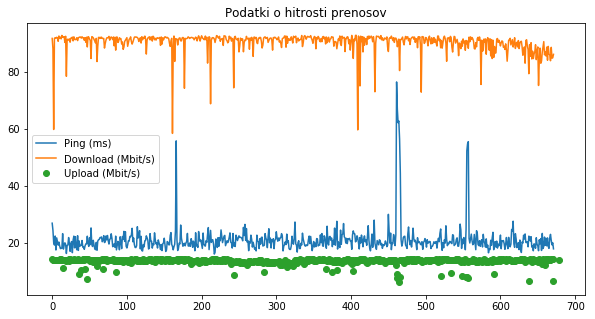

In [246]:
#t=pd.to_datetime(df1['Date']+' '+df1['Time'])
pp.figure(figsize=[10,5])
pp.plot(df1['Ping (ms)'],label='Ping (ms)')
pp.plot(df1['Download (Mbit/s)'],label='Download (Mbit/s)')
pp.plot(df1['Upload (Mbit/s)'],'o',label='Upload (Mbit/s)')
pp.legend()
pp.title('Podatki o hitrosti prenosov')
pp.show()

In [227]:
df1c.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


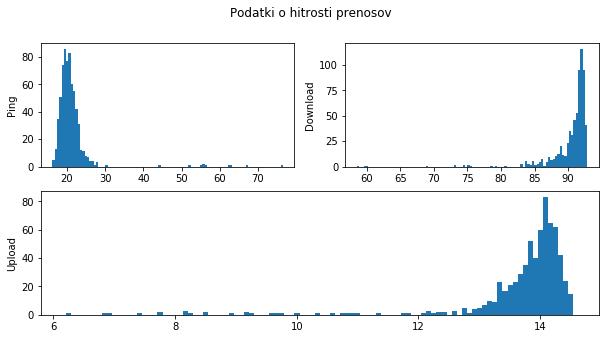

In [257]:
pp.figure(figsize=[10,5])
pp.subplot(221)
pp.suptitle('Podatki o hitrosti prenosov')
pp.hist(df1['Ping (ms)'],100)
pp.ylabel('Ping')
pp.subplot(222)
pp.hist(df1['Download (Mbit/s)'],100)
pp.ylabel('Download')
pp.subplot(212)
pp.hist(df1['Upload (Mbit/s)'],100)
pp.ylabel('Upload')

#pp.tight_layout()
pp.show()


## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



In [258]:
df1c.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [270]:
df2=df1c.drop(columns=['Time','Date','Ping (ms)'])

In [271]:
df2.head()

,Download (Mbit/s),Upload (Mbit/s)
0,91.80,14.31
1,88.19,14.12
2,59.86,14.11
3,91.81,14.22
4,92.05,14.08


In [272]:
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}


In [273]:
df2=df2.rename(columns=lookup)

In [274]:
df2['ping_rate']=1000/df1c['Ping (ms)']

In [275]:
df2.head()

,download_rate,upload_rate,ping_rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [284]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [277]:
def f(x):
    return x**2

In [279]:
interact(f,x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [291]:
def scatter_view(x,y,z,azim,elev):
    fig=pp.figure(figsize=[10,5])
    ax=Axes3D(fig)
    ax.scatter(x,y,z)
    ax.set_zlabel('P rate')
    ax.set_ylabel('U rate')
    ax.set_xlabel('D rate')
    ax.set_title('Naslov')
    ax.azim=azim
    ax.elev=elev

In [292]:
interact(lambda azim,elev: scatter_view(df2['download_rate'],
        df2['upload_rate'],df2['ping_rate'],azim,elev),azim=(0,90),elev=(0,90))

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

<function __main__.<lambda>(azim, elev)>

**Euclidean Anomaly Detection**
